In [4]:
from covid_health.prep_ecdc import parse_covid_world_data
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = parse_covid_world_data()
df

,time,tot_n_cases,n_deceased,geo,geo_id,country_code,population
0,2020-04-08,30,4,Afghanistan,AF,AFG,37172386.0
1,2020-04-07,38,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-06,29,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-05,35,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-04,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...
9508,2020-03-25,0,0,Zimbabwe,ZW,ZWE,14439018.0
9509,2020-03-24,0,1,Zimbabwe,ZW,ZWE,14439018.0
9510,2020-03-23,0,0,Zimbabwe,ZW,ZWE,14439018.0
9511,2020-03-22,1,0,Zimbabwe,ZW,ZWE,14439018.0


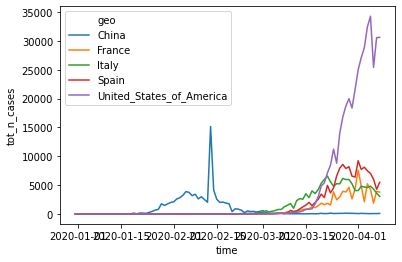

In [9]:
subset = df.loc[
    df.geo.isin(
        df.groupby("geo")
        .tot_n_cases.max()
        .nlargest(5)
        .index
    )
]
sns.lineplot(data=subset, x="time", y="tot_n_cases", hue="geo")